In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import spacy
import gensim.corpora as corpora
from gensim.corpora import Dictionary
nlp = spacy.load('en_core_web_sm')
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [2]:
df_dataset = pd.read_csv('/Users/XXXX-2/git_projs/bertopic_dignity/new_datasets/datasets/df_dataset.csv')
df_dataset.head(5)

,Unnamed: 0,itemid,docname,appno,judgementdate,law,facts,conclusion,full_text,judgement_type,...,phi3_summaries,facts_ne_removed,bertsum_ne_removed,textrank_ne_removed,cleaned_facts,cleaned_bertsum,cleaned_textrank,cleaned_facts_pos_removed,cleaned_bertsum_pos_removed,cleaned_textrank_pos_removed
0,0,001-209033,CASE OF HANDZHIYSKI v. BULGARIA,10783/14,06/04/2021 00:00:00,### THE LAW\n\n- ALLEGED VIOLATION OF ARTICLE ...,THE FACTS 2. The applicant was born in 1971 a...,"### FOR THESE REASONS, THE COURT\n\n- Declares...",FOURTH SECTIONCASE OF HANDZHIYSKI v. BULGARIA(...,CHAMBER,...,"On 28 December 2012, a man from Blagoevgrad p...",THE . The was born in and lives in . He was...,"['Together, these provided majority of out ...","['Following parliamentary elections on , on ...",. born lives . represented . Ekimdz...,"['Together, provided majority total ...","['Following parliamentary elections , new ...",". lives . . Ekimdzhiev , lawyers . . Agent , ....","[ 'Together , majority members . ' , ' another...","[ elections , , Plamen ( whose member – ) , me..."
1,1,001-153349,CASE OF NALBANDYAN v. ARMENIA,9935/06;23339/06,31/03/2015 00:00:00,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT UNANIMOUSLY\n...",THIRD SECTION CASE OF NALBANDYAN v. ARMENIA (A...,CHAMBER,...,The domestic laws relevant to this case perta...,THE I. THE CIRCUMSTANCES OF THE . The applic...,['On the and applicants were formally arre...,"['In doing so, the examined and dismissed the ...",". CIRCUMSTANCES . applicants born , ...",[' applicants formally arrested connec...,"[' , examined dismissed applicants’ all...",". CIRCUMSTANCES . applicants , respectively . ...",[ ' applicants formally connection murder . ' ...,"[ ' , applicants allegations grounds : ( ) all..."
2,2,001-104911,CASE OF R.R. v. POLAND,27617/04,26/05/2011 00:00:00,### THE LAW\n\n- 90. The applicant complained...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 6....,"### FOR THESE REASONS, THE COURT\n\n- 1. Join...",FOURTH SECTION CASE OF R.R. v. POLAND (Applica...,CHAMBER,...,The International Federation of Gynaecology a...,THE I. THE CIRCUMSTANCES OF THE . The was b...,"['On the was admitted to in T., within h...","['The also that, in member where abortion i...",. CIRCUMSTANCES . born . . Early v...,"[' admitted ., within covered , ...","[' , member abortion permitted number...",". CIRCUMSTANCES . . . B . . , ( later ) . , B....","[ ' . , within , advice . ' , ' doctors B. , R...","[ ' , member abortion number reasons , always ..."
3,3,001-150648,CASE OF CIORCAN AND OTHERS v. ROMANIA,29414/09;44841/09,27/01/2015 00:00:00,### THE LAW\n\n- I. JOINDER OF THE APPLICATIO...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT, UNANIMOUSLY,...",THIRD SECTION CASE OF CIORCAN AND OTHERS v. RO...,CHAMBER,...,The document discusses various incidents invo...,THE I. THE CIRCUMSTANCES OF THE . The applic...,['He was considered to require of medical tre...,"[' applicants: , , , , , (Biga), , , , (Big...",. CIRCUMSTANCES . applicants thirtyseven...,"[' considered require medical treatment.',...","[' applicants: , , , , , (Biga), , , , (Big...",. CIRCUMSTANCES . applicants nationals . neigh...,"[ ' treatment . ' , ' certificate , wound exco...","[ ' applicants : , , , , , ( Biga ) , , , , ( ..."
4,4,001-83882,CASE OF PETROPOULOU-TSAKIRIS v. GREECE,44803/04,06/12/2007 00:00:00,### THE LAW\n\n- I. ALLEGED VIOLATION OF ARTI...,THE FACTS I. THE CIRCUMSTANCES OF THE CASE 5....,"### FOR THESE REASONS, THE COURT\n\n- 1. Join...",FIRST SECTION CASE OF PETROPOULOUTSAKIRIS v. G...,CHAMBER,...,The Greek Helsinki Monitor's report on the ca...,THE I. THE CIRCUMSTANCES OF THE . The is of...,"['THE I. THE CIRCUMSTANCES OF THE .', 'On ...","['On police officers, the head of the secu...",. CIRCUMSTANCES . ethnic origin live...,"[' . CIRCUMSTANCES .', ' , . ., ...","[' police officers, head security po...",". CIRCUMSTANCES 

In [3]:
summaries = df_dataset['bert_summary']
summaries[0]

"['Together, these provided a majority of one hundred twentyone out of the total of two hundred and forty members of Parliament.', 'In another opinion poll carried out during the same period by another agency, fortyone per cent of the respondents said that the best political solution for the country would be for that government to resign and for new parliamentary elections to take place.', 'In December 1991 Blageovgrad’s municipal council resolved to remove Mr Blagoev’s statue from the town centre.', 'The next day, 26 December 2013, the applicant was charged with minor hooliganism contrary to Article 1 § 2 of the 1963 Decree on Combatting Minor Hooliganism (“the 1963 Decree” – see paragraphs 2223 below) in relation to his having placed the cap and the sack on Mr Blagoev’s statue.', 'For their part, his counsel argued that he had exercised his constitutional right to express his views.', 'Cultured people valued historical monuments and treated them with respect.', 'The “thin red line” b

In [4]:
import re

def further_preprocessing(text):
    
    # Convert the text to lowercase
    text = text.lower()

    # Remove anything that is not a word or space
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Lemmatize the text
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    
    # Remove single character strings
    tokens = [token for token in tokens if len(token) > 1]

    text = " ".join(tokens)

    # Remove the word "applicant"
    text = re.sub(r'\bapplicant\b', '', text)

    # Remove duplicate whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove any extra leading or trailing whitespace left after processing
    text = text.strip()
    
    return text

In [5]:
clean_summaries = summaries.apply(further_preprocessing)
clean_summaries[0]

'together these provide majority of one hundred twentyone out of the total of two hundred and forty member of parliament in another opinion poll carry out during the same period by another agency fortyone per cent of the respondent say that the good political solution for the country would be for that government to resign and for new parliamentary election to take place in december blageovgrad municipal council resolve to remove mr blagoevs statue from the town centre the next day december the be charge with minor hooliganism contrary to article of the decree on combat minor hooliganism the decree see paragraph below in relation to his having place the cap and the sack on mr blagoevs statue for their part his counsel argue that he have exercise his constitutional right to express his view cultured people value historical monument and treat they with respect the thin red line between proper political christmas joke and hooliganism have be cross in final judgment of january the blagoevgr

In [2]:
import os
import itertools
from tqdm import tqdm
from gensim.models.coherencemodel import CoherenceModel
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

/Users/XXXX-2/opt/anaconda3/envs/python38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#code for coherence inspired by MaartenGr's comment on this issue: https://github.com/MaartenGr/BERTopic/issues/90 (April 16, 2021)

#note that instead of cleaned_docs we have cleaned_facts

def compute_coherence(bertopic_model, clean_facts):
    # Extract vectorizer and analyzer from BERTopic
    vectorizer = bertopic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()
    tokens = [analyzer(doc) for doc in clean_facts]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

    # Evaluate
    coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence
    
    

def compute_topic_diversity(bertopic_model, top_n):
    topics = bertopic_model.get_topics()
    unique_words = set()
    total_words = 0
    
    for topic_id in range(len(topics)-1):
        topic_words = [word for word, _ in topics[topic_id][:top_n]]
        unique_words.update(topic_words)
        total_words += len(topic_words)
    
    topic_diversity = len(unique_words) / total_words
    return topic_diversity

In [8]:
from transformers import AutoTokenizer

# Load the tokenizer for the all-MiniLM-L6-v2 model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')


# Count the length of each input text in terms of word pieces
token_lengths = []
fit_within_limit_count = 0

for paragraph in clean_summaries:
    # Tokenize the input text and count the number of tokens (word pieces)
    tokens = tokenizer.tokenize(paragraph)
    token_length = len(tokens)
    token_lengths.append(token_length)
    
    # Check if the paragraph fits within the 256-token limit
    if token_length <= 256:
        fit_within_limit_count += 1

# Display the number of paragraphs that fit within the 256-token limit
print(f"Total number of summaries: {len(clean_summaries)}")
print(f"Number of summaries that fit within 256-token limit: {fit_within_limit_count}")


Token indices sequence length is longer than the specified maximum sequence length for this model (563 > 512). Running this sequence through the model will result in indexing errors


Total number of summaries: 1341
Number of summaries that fit within 256-token limit: 461


In [9]:
# Initialize the representation model, vectorizer model, and ctfidf model

# create model

#coherence fail at no of cluster = 1

param_grid = {
   "n_clusters": [2, 3, 4, 5 ,6 ,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "mmr_diversity": [0.2, 0.4, 0.6, 0.8, 1]
}
#since it was not possible to run bertopic with the gensim dictionary and corpus created for other 3 models, we decided to use the 
#Countvectorizer library to create bigrams and set max_df=0.3

vectorizer_model = CountVectorizer(ngram_range = (1,2), stop_words="english")  
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True, bm25_weighting=True)


combinations = list(itertools.product(
    param_grid['n_clusters'],
    param_grid['mmr_diversity']
))


# Initialize a list to store results
results = []

for n_clusters, mmr_diversity in tqdm(combinations):
    representation_model = MaximalMarginalRelevance(diversity=mmr_diversity, top_n_words=30)
    cluster_model = KMeans(n_clusters=n_clusters)

    topic_model = BERTopic(hdbscan_model=cluster_model,ctfidf_model=ctfidf_model,vectorizer_model=vectorizer_model,representation_model=representation_model, embedding_model = 'all-MiniLM-L6-v2', top_n_words=30)
    topics, probabilities = topic_model.fit_transform(clean_summaries)

    topic_coherence = compute_coherence(topic_model, clean_summaries)
    topic_diversity = compute_topic_diversity(topic_model, 10)

    # Get the number of topics generated by the model
    num_topics = len(topic_model.get_topics())

    #Save the model with a unique name

    model_name = f"bertopic_summaries_30_words_n_clusters_{n_clusters}_diversity_mmr_{mmr_diversity}.bertopic"
    topic_model.save(model_name)

    results.append({
        'model_name': model_name,
        'num_topics': n_clusters,
        'mmr_diversity':mmr_diversity,
        'coherence': topic_coherence,
        'topic_diversity': topic_diversity
    })


results_df = pd.DataFrame(results)
results_df.to_csv("bertopic_summaries_30_words_grid_search_results_final.csv", index=False)

print("Grid search completed and results saved.")
    

  0%|                                                                                                                               | 0/95 [00:00<?, ?it/s]/Users/XXXX-2/opt/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
2024-09-18 08:32:15,945 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
100%|███████

Grid search completed and results saved.


In [3]:
import pandas as pd
import csv
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
file_results_bertopic = '/Users/XXXX-2/git_projs/bertopic_dignity/bertopic_summaries_30_words_grid_search_results_final.csv'

df_metrics_bertopic = pd.read_csv(file_results_bertopic)
df_metrics_bertopic

,model_name,num_topics,mmr_diversity,coherence,topic_diversity
0,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.2,0.716812,1.000000
1,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.4,0.716812,1.000000
2,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.6,0.716812,1.000000
3,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.8,0.716812,1.000000
4,bertopic_summaries_30_words_n_clusters_2_diver...,2,1.0,0.716812,1.000000
5,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.2,0.846951,1.000000
6,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.4,0.846951,1.000000
7,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.6,0.846951,1.000000
8,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.8,0.846951,1.000000
9,bertopic_summaries_30_words_n_clusters_3_diver...,3,1.0,0.846951,1.000000


In [5]:
# Create a new column `quality` by multiplying `coherence` and `topic_diversity`
df_metrics_bertopic['quality'] = df_metrics_bertopic['coherence'] * df_metrics_bertopic['topic_diversity']

In [6]:
df_metrics_bertopic

,model_name,num_topics,mmr_diversity,coherence,topic_diversity,quality
0,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.2,0.716812,1.000000,0.716812
1,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.4,0.716812,1.000000,0.716812
2,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.6,0.716812,1.000000,0.716812
3,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.8,0.716812,1.000000,0.716812
4,bertopic_summaries_30_words_n_clusters_2_diver...,2,1.0,0.716812,1.000000,0.716812
5,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.2,0.846951,1.000000,0.846951
6,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.4,0.846951,1.000000,0.846951
7,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.6,0.846951,1.000000,0.846951
8,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.8,0.846951,1.000000,0.846951
9,bertopic_summaries_30_words_n_clusters_3_diver...,3,1.0,0.846951,1.000000,0.846951


In [7]:
# Group by `num_topics` and pick the row with the maximum `quality`
df_grouped_bertopic = df_metrics_bertopic.loc[df_metrics_bertopic.groupby('num_topics')['quality'].idxmax()].copy()

# Sort the dataframe on `num_topics` in ascending order
df_grouped_bertopic = df_grouped_bertopic.sort_values('num_topics')
df_grouped_bertopic

,model_name,num_topics,mmr_diversity,coherence,topic_diversity,quality
0,bertopic_summaries_30_words_n_clusters_2_diver...,2,0.2,0.716812,1.000000,0.716812
5,bertopic_summaries_30_words_n_clusters_3_diver...,3,0.2,0.846951,1.000000,0.846951
10,bertopic_summaries_30_words_n_clusters_4_diver...,4,0.2,0.802931,0.966667,0.776166
15,bertopic_summaries_30_words_n_clusters_5_diver...,5,0.2,0.800334,0.950000,0.760317
24,bertopic_summaries_30_words_n_clusters_6_diver...,6,1.0,0.786075,0.900000,0.707468
28,bertopic_summaries_30_words_n_clusters_7_diver...,7,0.8,0.752423,0.866667,0.652100
32,bertopic_summaries_30_words_n_clusters_8_diver...,8,0.6,0.747131,0.842857,0.629725
36,bertopic_summaries_30_words_n_clusters_9_diver...,9,0.4,0.728829,0.875000,0.637725
40,bertopic_summaries_30_words_n_clusters_10_dive...,10,0.2,0.711428,0.866667,0.616571
48,bertopic_summaries_30_words_n_clusters_11_dive...,11,0.8,0.719222,0.810000,0.582570


In [23]:
df_grouped_bertopic = df_grouped_bertopic.rename(columns={
    'coherence': 'Coherence',
    'topic_diversity': 'Topic Diversity',
    'quality': 'Quality'
})

# To confirm the renaming, you can print the columns
print(df_grouped_bertopic.columns)

Index(['model_name', 'num_topics', 'mmr_diversity', 'Coherence',
       'Topic Diversity', 'Quality'],
      dtype='object')


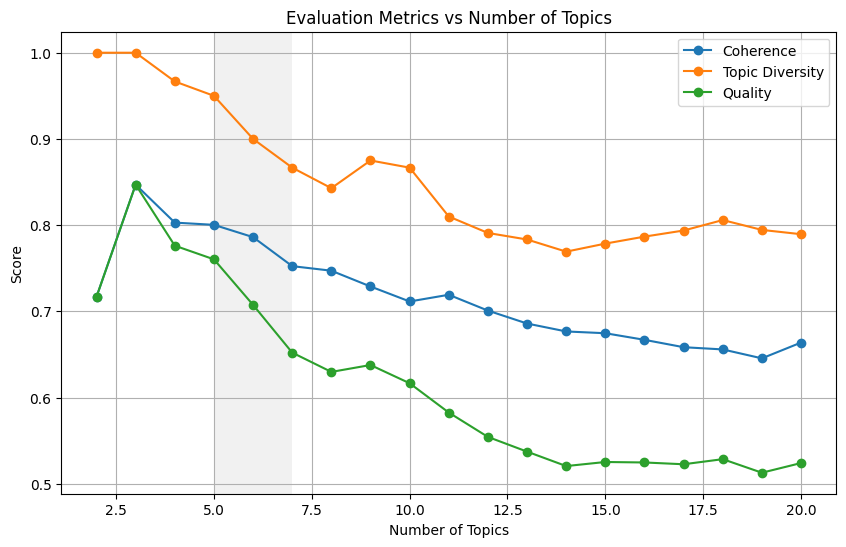

In [24]:
import matplotlib.pyplot as plt

# Filter the dataframe `df_grouped` to get the row where the `quality` is maximum and `num_topics` is greater than 5
df_max_quality = df_grouped_bertopic[(df_grouped_bertopic['Quality'] == df_grouped_bertopic[df_grouped_bertopic['num_topics'] > 5]['Quality'].max())]

# Get the `num_topics` corresponding to the maximum `quality` from `df_max_quality`
max_quality_num_topics = df_max_quality['num_topics'].values[0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot each metric as a line
for metric in ['Coherence', 'Topic Diversity', 'Quality']:
    plt.plot(df_grouped_bertopic['num_topics'], df_grouped_bertopic[metric], label=metric, marker='o')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs Number of Topics')

# Add legend
plt.legend(loc='upper right')

# Highlight the area of maximum quality (num_topics > 5)
plt.axvspan(max_quality_num_topics - 1, max_quality_num_topics + 1, facecolor='lightgray', alpha=0.3)


# Show the plot
plt.grid(True)
plt.savefig('bertopic_summaries_30_words.png')
plt.show()

In [9]:
from bertopic import BERTopic
#Load the best model and visualize the topics
model_5 = "/Users/XXXX-2/git_projs/bertopic_dignity/bertopic_summaries_30_words_n_clusters_5_diversity_mmr_0.2.bertopic"
topic_model_5 = BERTopic.load(model_5)


topic_model_5.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,574,0_prison_detention_cell_prisoner,"[prison, detention, cell, prisoner, court, med...",[decision of january which be applicable from ...
1,1,410,1_police_officer_prosecutor_police officer,"[police, officer, prosecutor, police officer, ...",[late in the evening large number of police of...
2,2,302,2_court_article_law_right,"[court, article, law, right, act, public, case...",[on september pravoye delo publish an anonymou...
3,3,37,3_complain confinement_confinement metal_court...,"[complain confinement, confinement metal, cour...",[the list of and the relevant detail of the ap...
4,4,18,4_complain torture_treatment raise_appended_ap...,"[complain torture, treatment raise, appended, ...",[the list of and the relevant detail of the ap...


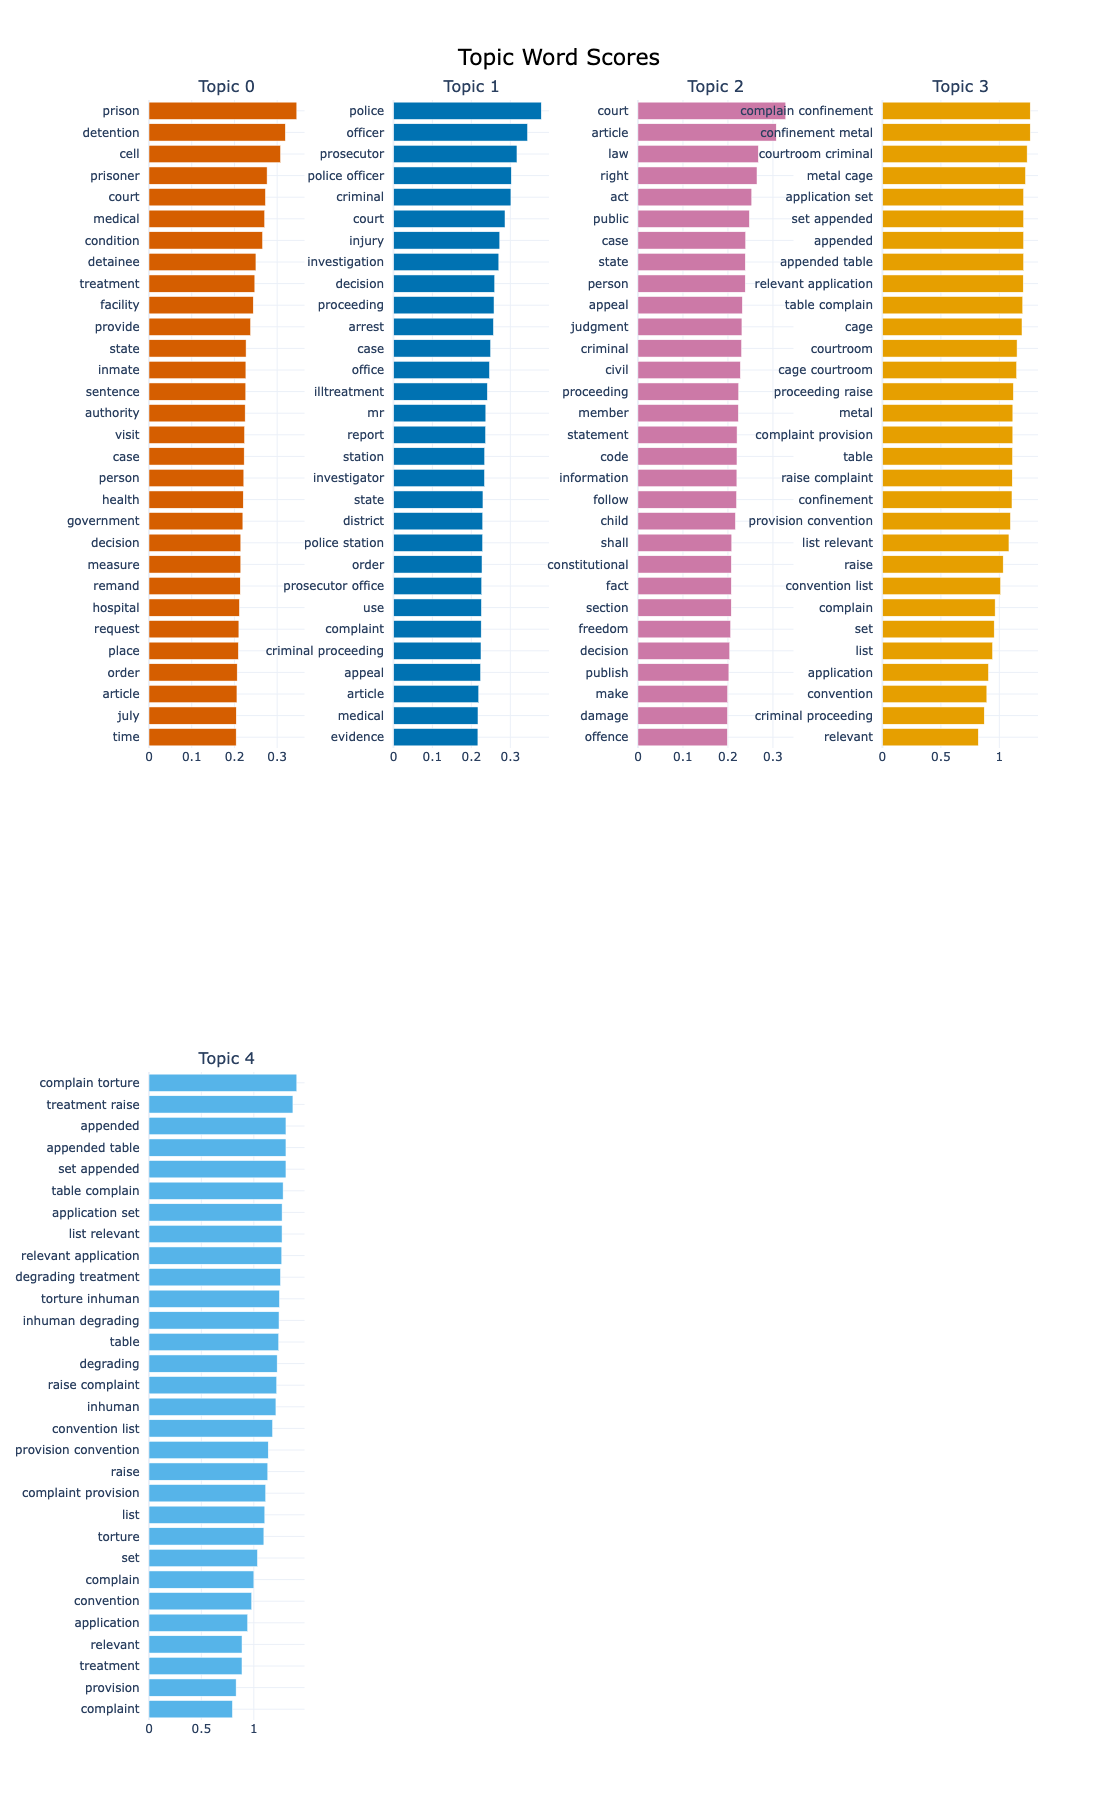

In [17]:
fig_ = topic_model_5.visualize_barchart(n_words= 30, top_n_topics=5, height = 900, width = 500)
# Save the plot as a PNG file
fig_.write_image("/Users/XXXX-2/git_projs/bertopic_dignity/summary_30_words_best_topic_model_barchart.png")

# Display the plot in Jupyter
fig_.show()
